### Name: Prabhat Dwivedi
### Roll No: 2018IMT-067
### Course: Machine Learning Lab
### Course Code: ITIT - 4107
### Deadline : 25 September 2021

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import idx2numpy
from sklearn.metrics import classification_report

In [2]:
x_train = idx2numpy.convert_from_file('train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
x_test = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

In [3]:
assert x_train.shape == (60000, 28, 28)
assert y_train.shape == (60000, )
assert x_test.shape == (10000, 28, 28)
assert y_test.shape == (10000, )

Taking random image from the dataset

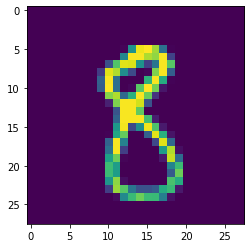

In [4]:
a = np.random.randint(60000)
plt.figure()
plt.imshow(x_train[a])
plt.show()

Flattening the matrix in vector form

In [5]:
x_flatten = x_train.reshape(x_train.shape[0], -1)
assert x_flatten.shape == (60000, 784)

Grey scale image into binary image conversion for better handling

In [6]:
x_binary = []
for j in range(x_flatten.shape[0]):
#     x_binary[j].append([1 if i >=1 else 0 for i in x_flatten[0]])
    x_binary.append([1 if i >=1 else 0 for i in x_flatten[j]])

    
x_binary = np.array(x_binary)
x_binary.reshape(x_flatten.shape[0], -1)
assert x_binary.shape == (60000, 784)

Picking Random image from the binarized form to check modified datasets

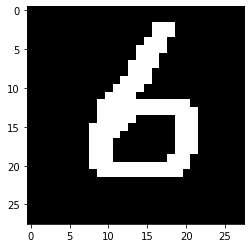

In [7]:
a = np.random.randint(60000)
plt.figure()
plt.imshow(x_binary[a].reshape(28, 28), cmap='gray')
plt.grid(False)

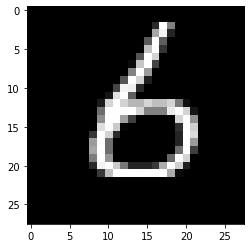

In [8]:
plt.figure()
plt.imshow(x_flatten[a].reshape(28, 28), cmap='gray')
plt.grid(False)

Calculating the prior for predicting the smaple by Counting the number samples for each of the classes/labels.

In [9]:
classes, classes_count = np.unique(y_train, return_counts=True)
prior = classes_count / len(y_train)
number_of_classes = len(classes)

In [10]:
prior

array([0.09871667, 0.11236667, 0.0993    , 0.10218333, 0.09736667,
       0.09035   , 0.09863333, 0.10441667, 0.09751667, 0.09915   ])

Counting the number of times the pixel of image of same class was True, i.e. number of times the given value of pixel is true given that it belongs to particular class. i.e. P(x_0=1 | C)

In [12]:
count_pixel = np.zeros((10, x_binary.shape[1]), dtype=np.float64)
for k, y_k in enumerate(np.unique(y_train)):
    ind = np.where(y_k == y_train)
    count_pixel[k] = np.sum(x_binary[ind], axis = 0)
    
final_count = np.sum(count_pixel, axis=0)

In [13]:
def likelihood(x, cnt, class_cnt):
    like = []
    for i in range(len(x)):
        if x[i] == 1:
            like.append(cnt[i]/class_cnt)
        else:
            like.append((class_cnt-cnt[i])/class_cnt)
    return np.prod(like)


def likelihood_with_smoothing(x, cnt, class_cnt):
    like = []
    for i in range(len(x)):
        if x[i] == 1:
            like.append((cnt[i]+1)/(class_cnt+2))
        else:
            like.append((class_cnt-cnt[i] + 1)/(class_cnt+2))
    return np.prod(like)

In [14]:
def predict(x):
    return np.argmax([prior[k] * likelihood(x, count_pixel[k], classes_count[k]) for k in range(10)])

def predict_with_smoothing(x):
    return np.argmax([prior[k] * likelihood_with_smoothing(x, count_pixel[k], classes_count[k]) for k in range(10)])

In [15]:
for i in range(10):
    assert predict(x_binary[i]) == y_train[i]

## Testing the model with the test dataset
### 1 Without smoothing


In [16]:
def test(x, y):
    x_test_flatten = x.reshape(x.shape[0], -1)
    x_binary_test = []
    for j in range(x_test_flatten.shape[0]):
        x_binary_test.append([1 if i >=1 else 0 for i in x_test_flatten[j]])
    x_binary_test = np.array(x_binary_test)
    x_binary_test.reshape(x_test_flatten.shape[0], -1)
    print("done binarization")
    y_pred = []
    for i in range(10000):
        y_pred.append(predict(x_binary_test[i]))
        print(f'done {i}th iteration')
    return y_pred

In [17]:
y_hat = test(x_test, y_test)

done binarization
done 0th iteration
done 1th iteration
done 2th iteration
done 3th iteration
done 4th iteration
done 5th iteration
done 6th iteration
done 7th iteration
done 8th iteration
done 9th iteration
done 10th iteration
done 11th iteration
done 12th iteration
done 13th iteration
done 14th iteration
done 15th iteration
done 16th iteration
done 17th iteration
done 18th iteration
done 19th iteration
done 20th iteration
done 21th iteration
done 22th iteration
done 23th iteration
done 24th iteration
done 25th iteration
done 26th iteration
done 27th iteration
done 28th iteration
done 29th iteration
done 30th iteration
done 31th iteration
done 32th iteration
done 33th iteration
done 34th iteration
done 35th iteration
done 36th iteration
done 37th iteration
done 38th iteration
done 39th iteration
done 40th iteration
done 41th iteration
done 42th iteration
done 43th iteration
done 44th iteration
done 45th iteration
done 46th iteration
done 47th iteration
done 48th iteration
done 49th it

## Accuracy of model

In [18]:
count = 0;
for i in range(10000):
    if y_hat[i]==y_test[i]:
        count+=1
print(f'Accuracy of the model without smooting is {count*100/y_test.shape[0]}%')

Accuracy of the model without smooting is 84.1%


In [24]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       981
           1       0.96      0.90      0.93      1204
           2       0.83      0.89      0.86       964
           3       0.83      0.76      0.80      1106
           4       0.81      0.83      0.82       955
           5       0.70      0.82      0.75       769
           6       0.89      0.89      0.89       952
           7       0.85      0.92      0.88       943
           8       0.78      0.76      0.77       995
           9       0.84      0.75      0.79      1131

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### 2 With smoothing 

In [19]:
def test_2(x, y):
    x_test_flatten = x.reshape(x.shape[0], -1)
    x_binary_test = []
    for j in range(x_test_flatten.shape[0]):
        x_binary_test.append([1 if i >=1 else 0 for i in x_test_flatten[j]])
    x_binary_test = np.array(x_binary_test)
    x_binary_test.reshape(x_test_flatten.shape[0], -1)
    print("done binarization")
    y_pred = []
    for i in range(10000):
        y_pred.append(predict(x_binary_test[i]))
        print(f'done {i}th iteration')
    return y_pred

y_hat_smoothing = test_2(x_test, y_test)

done binarization
done 0th iteration
done 1th iteration
done 2th iteration
done 3th iteration
done 4th iteration
done 5th iteration
done 6th iteration
done 7th iteration
done 8th iteration
done 9th iteration
done 10th iteration
done 11th iteration
done 12th iteration
done 13th iteration
done 14th iteration
done 15th iteration
done 16th iteration
done 17th iteration
done 18th iteration
done 19th iteration
done 20th iteration
done 21th iteration
done 22th iteration
done 23th iteration
done 24th iteration
done 25th iteration
done 26th iteration
done 27th iteration
done 28th iteration
done 29th iteration
done 30th iteration
done 31th iteration
done 32th iteration
done 33th iteration
done 34th iteration
done 35th iteration
done 36th iteration
done 37th iteration
done 38th iteration
done 39th iteration
done 40th iteration
done 41th iteration
done 42th iteration
done 43th iteration
done 44th iteration
done 45th iteration
done 46th iteration
done 47th iteration
done 48th iteration
done 49th it

## Accuracy of model

In [20]:
count_smoothing = 0;
for i in range(10000):
    if y_hat_smoothing[i]==y_test[i]:
        count_smoothing+=1
print(f'Accuracy of the model without smooting is {count_smoothing*100/y_test.shape[0]}%')

Accuracy of the model without smooting is 84.1%


In [23]:
print(classification_report(y_hat_smoothing, y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       981
           1       0.96      0.90      0.93      1204
           2       0.83      0.89      0.86       964
           3       0.83      0.76      0.80      1106
           4       0.81      0.83      0.82       955
           5       0.70      0.82      0.75       769
           6       0.89      0.89      0.89       952
           7       0.85      0.92      0.88       943
           8       0.78      0.76      0.77       995
           9       0.84      0.75      0.79      1131

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## ACCURACY OF BOTH MODELS (WITH AND WITHOUT SMOOTHING) COMES OUT TO BE CLOSE BECAUSE SMOOTHING VALUE IS SET TO LOW.